# Data Preparation

During today and following days, we will have a set of exercises about the data with UFO sightings around the world. At the end, we will create a machine learning model that will predict how long we can see the UFO based on the characteristics of a sighting.

Now, in this file, we are going to focus on data preparation. Try to replicate the steps from the tutorial, become familiar with the information and variables in the data and prepare it for the next phase, feature engineering.

You can download the data from [**here**](https://drive.google.com/open?id=0B2gZvn36c5CmRTJpS3pkUllmX1U).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Exercise

In [2]:
with open('UFO_data.csv') as f:
    ufo=pd.read_csv(f,sep=';',low_memory=False, index_col=0)

In [20]:
ufo.iloc[:7,24:]

,pressureError,summary,temperature,temperatureError,time,visibility,visibilityError,windBearing,windBearingError,windSpeed,windSpeedError,ast_absolute_magnitude_h,ast_estimated_diameter,ast_is_dangerous,ast_miss_distance,ast_orbiting_body,ast_relative_velocity
0,NaN,Clear,25.86,NaN,-638227800.0,16.09,NaN,154.0,NaN,4.89,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
1,NaN,Clear,26.12,NaN,-638226000.0,16.09,NaN,135.0,NaN,6.60,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
2,NaN,Foggy,15.56,NaN,-448959600.0,2.90,NaN,NaN,NaN,NaN,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
3,NaN,Clear,22.68,NaN,-417304800.0,16.09,NaN,136.0,NaN,2.75,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
4,NaN,Mostly Cloudy,25.74,NaN,-291060000.0,16.09,NaN,80.0,NaN,3.60,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
5,NaN,Clear,22.22,NaN,-259549200.0,16.09,NaN,NaN,NaN,NaN,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
6,NaN,NaN,NaN,NaN,-133329600.0,NaN,NaN,NaN,NaN,NaN,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043


In [10]:
# df_ufo.iloc[:,0].drop()
df_ufo =ufo.copy()

In [17]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(ufo)
# prof.to_file(output_file='output.html')
cool=df_ufo.columns.to_list()
cool=[i for i in cool if 'Error' not in i]
cool=[i for i in cool if 'ast' not in i]
# cool

In [16]:
@interact
def describe(column=cool):
    print(df_ufo[column].describe())

interactive(children=(Dropdown(description='column', options=('timestamp', 'city', 'state', 'country', 'shape'…

In [21]:
df_ufo=df_ufo[cool]
df_ufo.head(3)

,timestamp,city,state,country,shape,duration_seconds,duration_text,notes,date_reported,lat,...,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,visibility,windBearing,windSpeed
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27 00:00:00,29.883056,...,0.0,0.0,NaN,1009.05,Clear,25.86,-638227800.0,16.09,154.0,4.89
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16 00:00:00,29.384210,...,0.0,0.0,NaN,1008.81,Clear,26.12,-638226000.0,16.09,135.0,6.60
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21 00:00:00,53.200000,...,NaN,NaN,rain,1019.00,Foggy,15.56,-448959600.0,2.90,NaN,NaN


In [18]:
sns.regplot(x="duration_seconds", y="duration_text", data=df_ufo)

TypeError: can't multiply sequence by non-int of type 'float'

Error in callback <function flush_figures at 0x0000018A2D506D38> (for post_execute):


KeyboardInterrupt: 

In [24]:
# the columns with error as to many nan values so i dropped them
new_col= [i for i in other if 'Error' not in i]
df2_ufo=df_ufo[new_col]

In [25]:
df2_ufo=df2_ufo.drop(columns=['time','lat','lng','ast_estimated_diameter','ast_miss_distance'])
df2_ufo.head()
['duration_seconds','apparentTemperature','dewPoint','temperature',]

['duration_seconds', 'apparentTemperature', 'dewPoint', 'temperature']

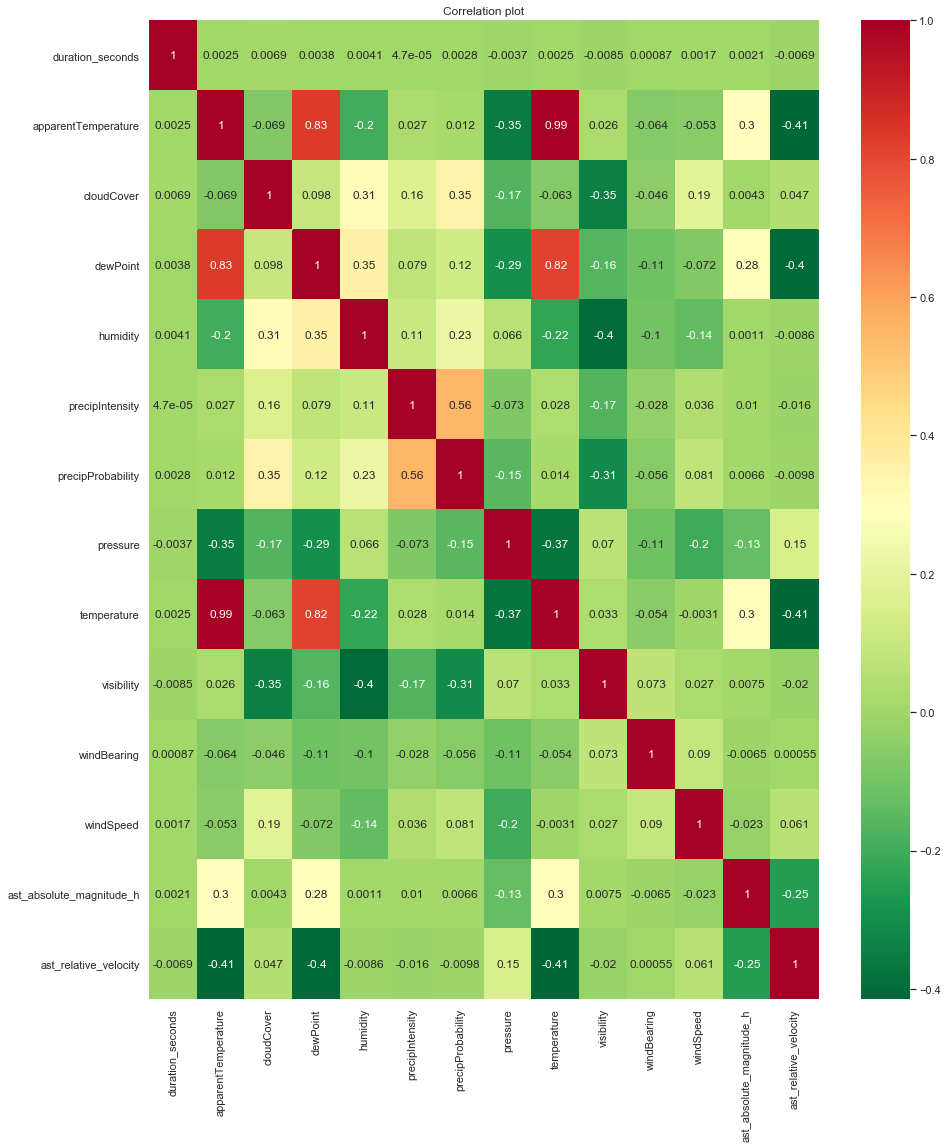

In [27]:
df_corr = df2_ufo.corr()
# plot the correlations
sns.set(rc={'figure.figsize':(15,18)})
sns.heatmap(df_corr,annot=True,cmap="RdYlGn_r")
plt.title('Correlation plot')
plt.show()

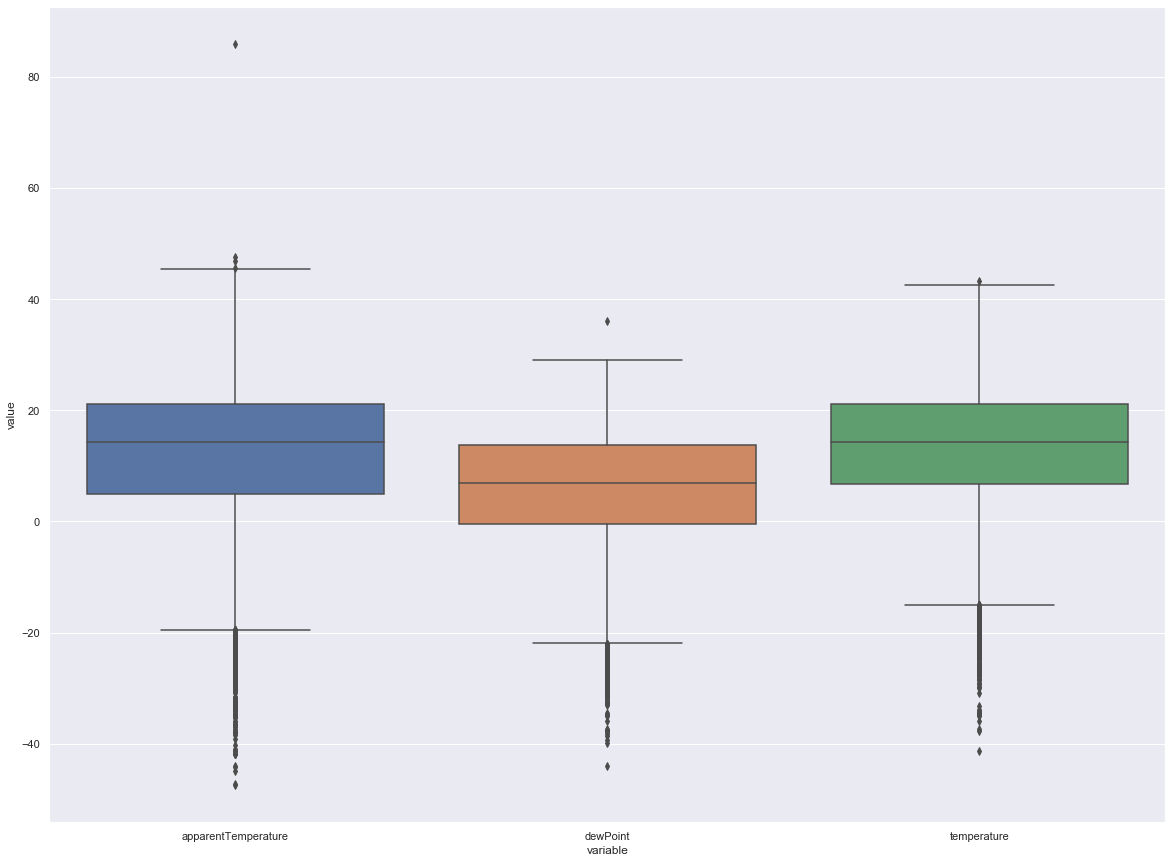

In [30]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(x="variable", y="value",ax=ax,data=pd.melt(df2_ufo[['apparentTemperature','dewPoint','temperature']]))
plt.show()